In [3]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn import tree, metrics, model_selection, preprocessing
from IPython.display import Image, display
#from utils import plot_decision
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [4]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
wine = datasets.load_wine()
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [5]:
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

In [16]:
X = wine.data
y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

In [17]:
dtree_ent= tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
dtree_gini = tree.DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
dtree_max = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
dtree_ent.fit(X_train, y_train)
dtree_gini.fit(X_train, y_train)
dtree_max.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [18]:
# use the model to make predictions with the test data
y_pred_ent = dtree_ent.predict(X_test)
y_pred_gini = dtree_gini.predict(X_test)
y_pred_max = dtree_max.predict(X_test)

In [19]:
# how did our model perform?
count_misclassified = (y_test != y_pred_ent).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred_ent)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 5
Accuracy: 0.93


In [20]:
count_misclassified = (y_test != y_pred_gini).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred_gini)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 7
Accuracy: 0.90


In [21]:
count_misclassified = (y_test != y_pred_max).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred_max)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 5
Accuracy: 0.93


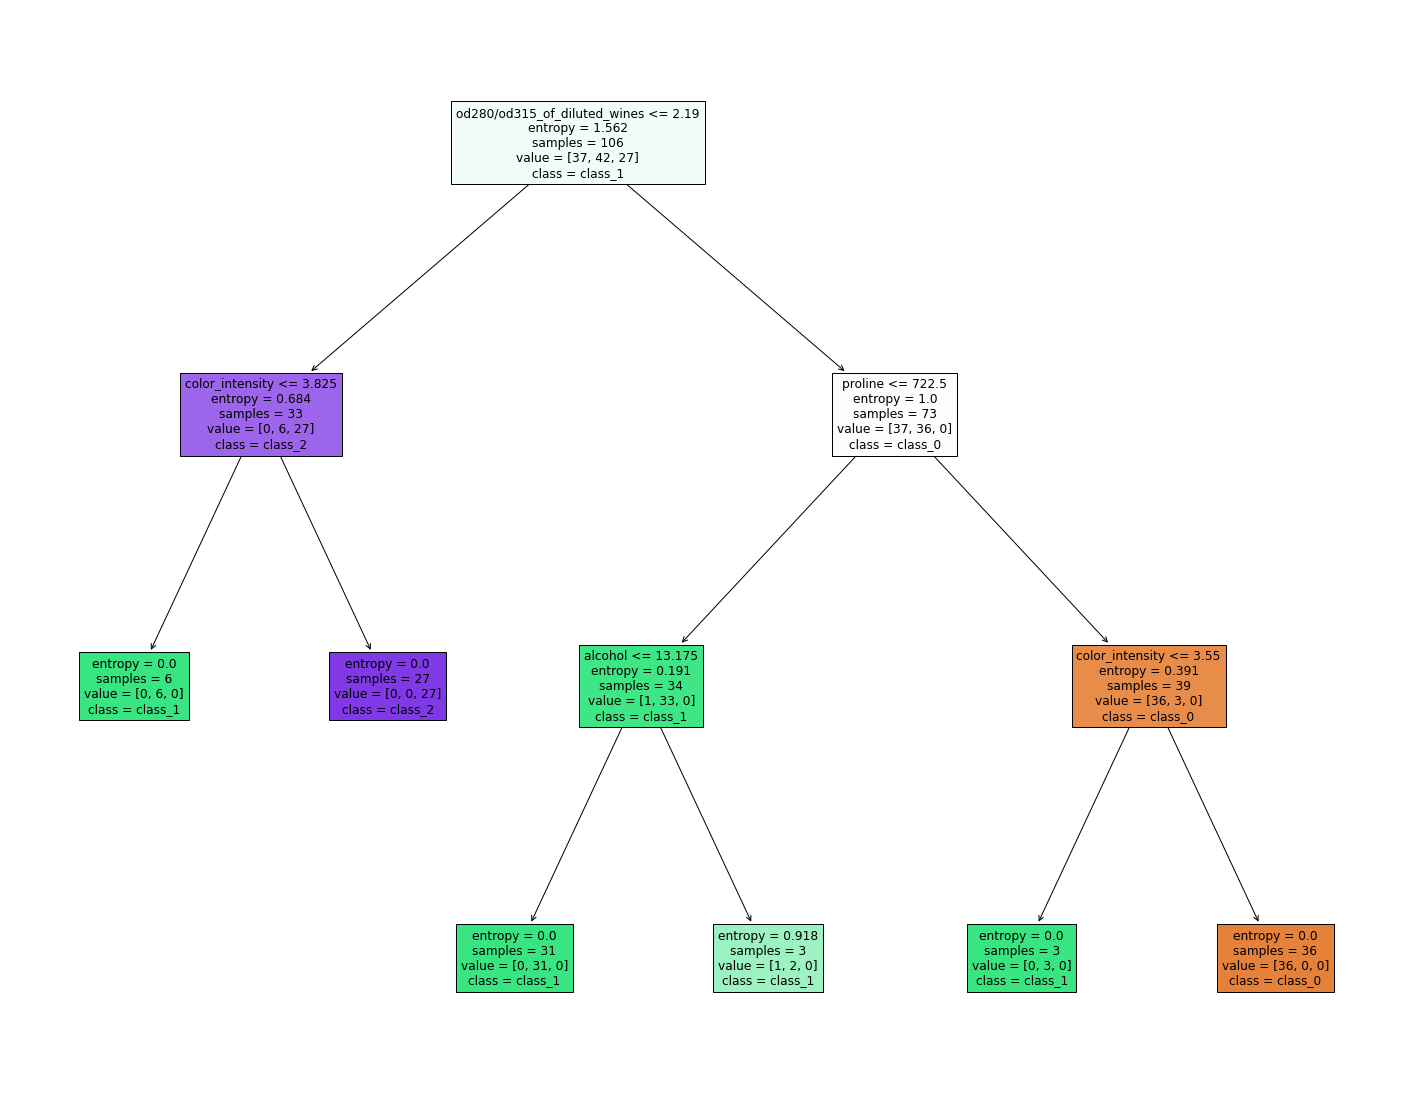

In [22]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree_ent, 
                   feature_names=wine.feature_names,  
                   class_names=wine.target_names,
                   filled=True)

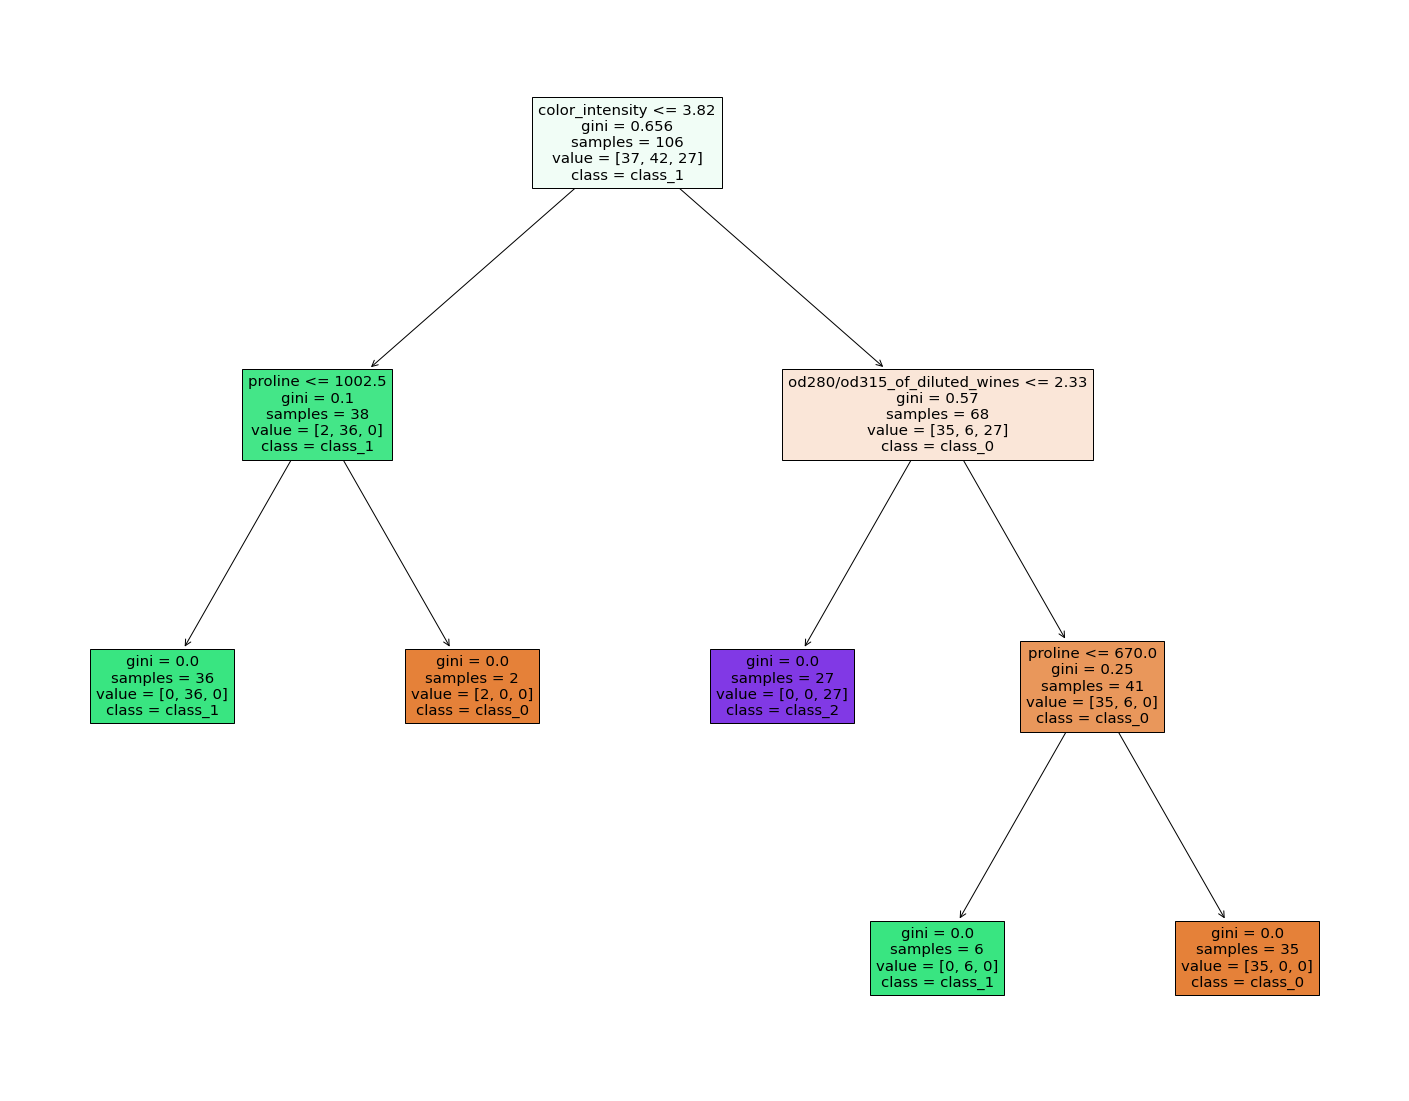

In [23]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree_gini, 
                   feature_names=wine.feature_names,  
                   class_names=wine.target_names,
                   filled=True)

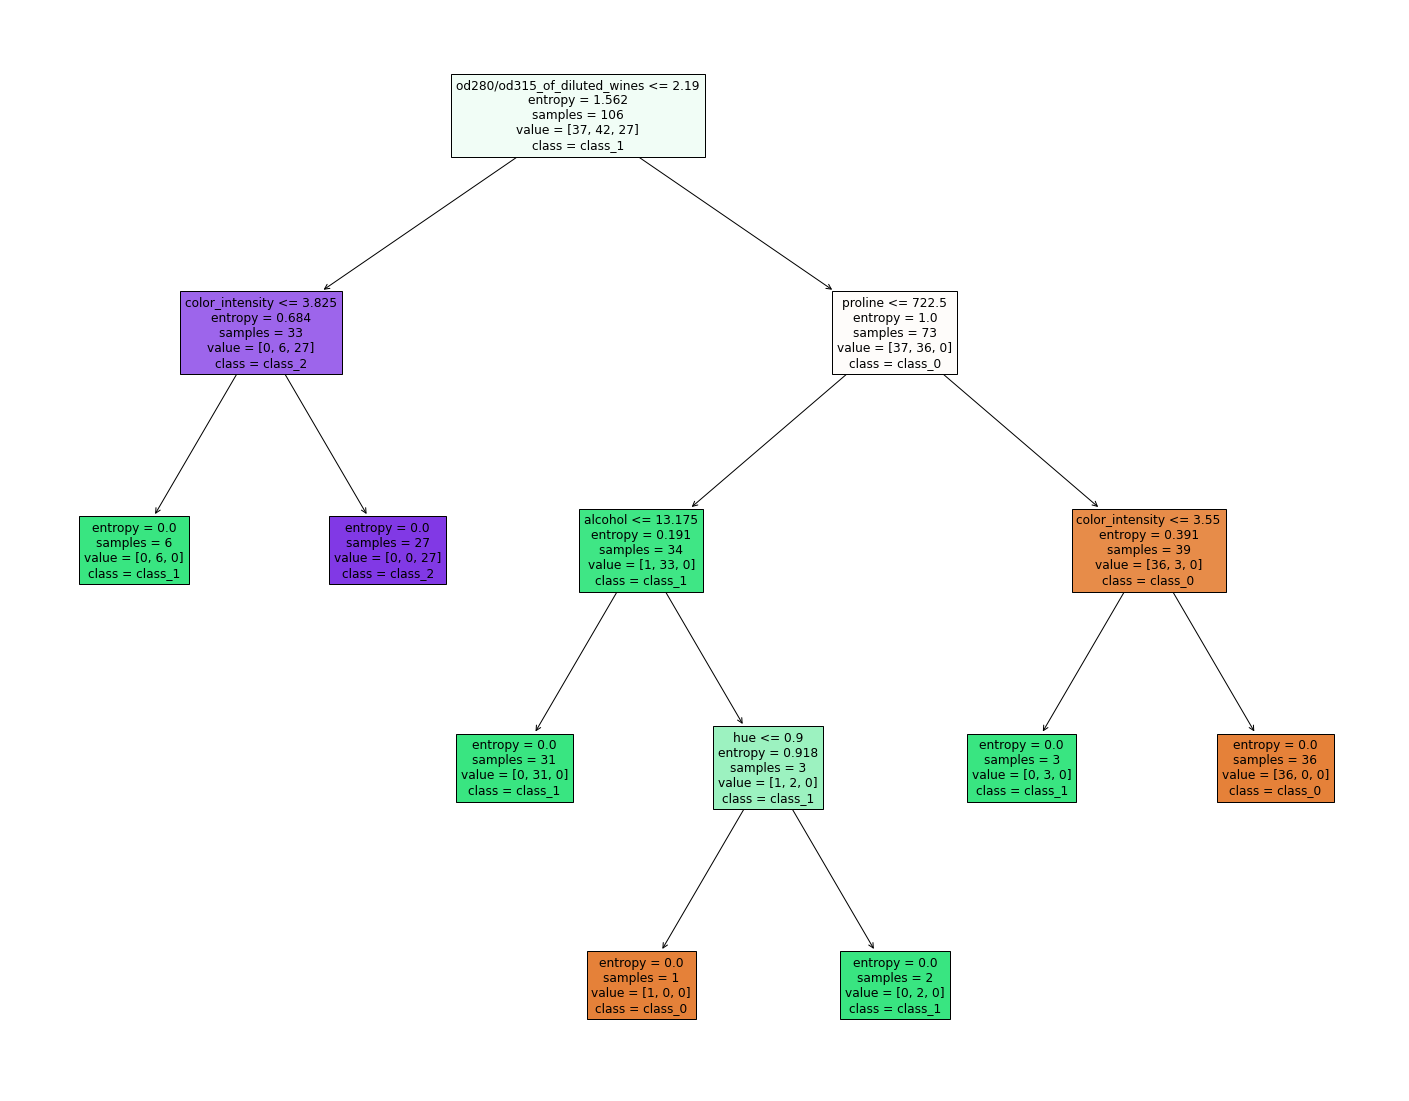

In [24]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree_max, 
                   feature_names=wine.feature_names,  
                   class_names=wine.target_names,
                   filled=True)